In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
selected_columns = [
    'bant_submit', 'customer_country', 'business_unit', 'com_reg_ver_win_rate',
    'customer_idx', 'customer_type', 'enterprise', 'historical_existing_cnt',
    'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'customer_job',
    'lead_desc_length', 'inquiry_type', 'product_category', 'product_subcategory',
    'product_modelname', 'customer_country.1', 'customer_position',
    'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
    'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area', 'business_subarea',
    'lead_owner'
]

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'

df = pd.read_csv(train_file_path)

총 갯수 : 4850
전체 비율 : 8.178890031872376


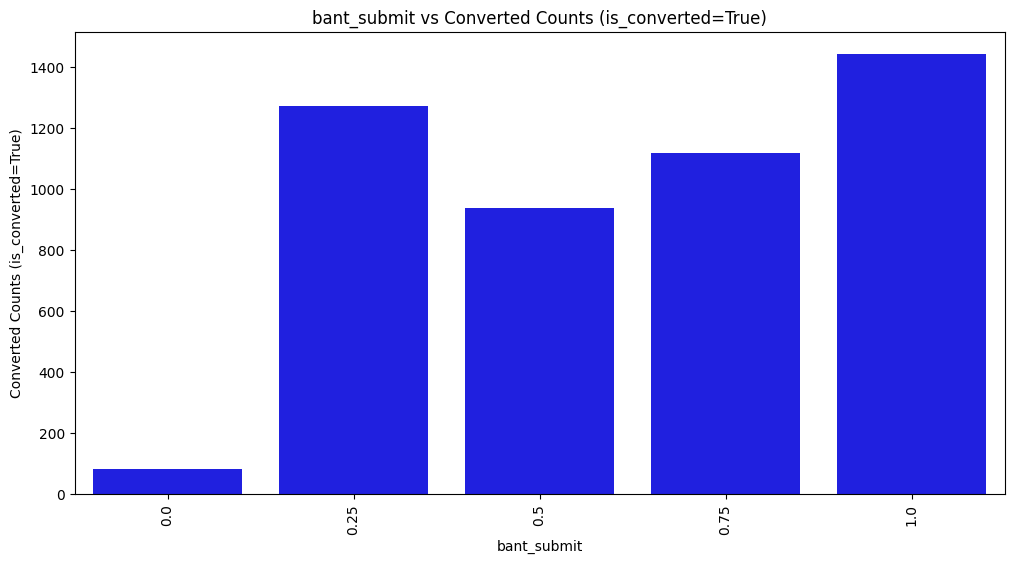

In [19]:
converted_counts = df.groupby('bant_submit')['is_converted'].sum().reset_index()
converted_counts_non_zero = converted_counts[converted_counts['is_converted'] > 0]

total = converted_counts_non_zero['is_converted'].sum()
print("총 갯수 :", total)
temp = 59299
print("전체 비율 :", total/temp*100)

plt.figure(figsize=(12, 6))
sns.barplot(x='bant_submit', y='is_converted', data=converted_counts_non_zero, color='blue')
plt.title('bant_submit vs Converted Counts (is_converted=True)')
plt.xlabel('bant_submit')
plt.ylabel('Converted Counts (is_converted=True)')
plt.xticks(rotation='vertical')

plt.show()

0.0 중에서의 is_converted 비율: 15.98%, 전체 갯수: 513, is_converted된 갯수: 82
0.25 중에서의 is_converted 비율: 9.90%, 전체 갯수: 12852, is_converted된 갯수: 1272
0.5 중에서의 is_converted 비율: 5.45%, 전체 갯수: 17192, is_converted된 갯수: 937
0.75 중에서의 is_converted 비율: 9.56%, 전체 갯수: 11681, is_converted된 갯수: 1117
1.0 중에서의 is_converted 비율: 8.45%, 전체 갯수: 17061, is_converted된 갯수: 1442


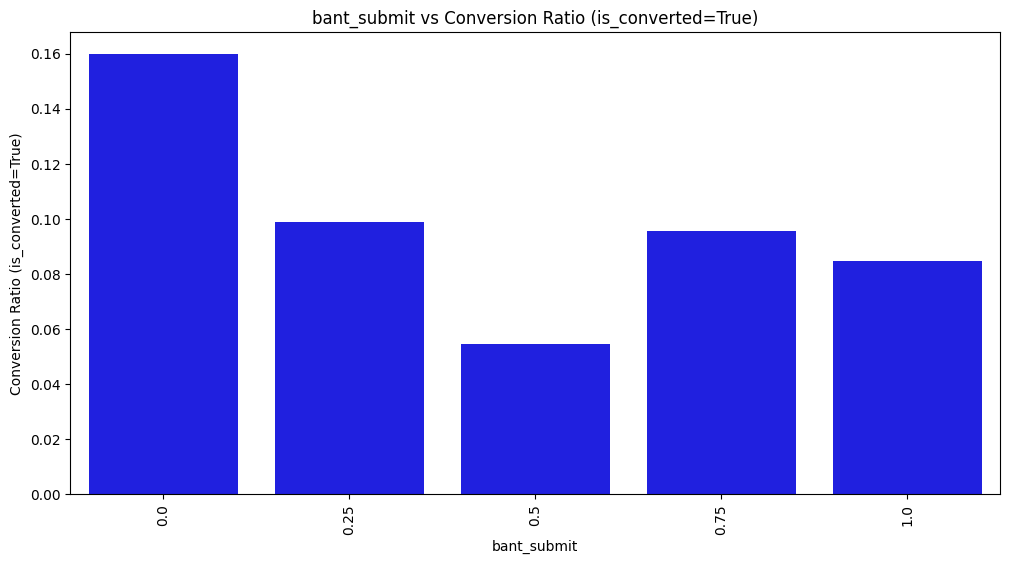

In [23]:
converted_counts = df.groupby('bant_submit')['is_converted'].sum().reset_index()
total_counts = df.groupby('bant_submit')['is_converted'].count().reset_index()

ratio_df = pd.merge(converted_counts, total_counts, on='bant_submit', how='left')
ratio_df['conversion_ratio'] = ratio_df['is_converted_x'] / ratio_df['is_converted_y']

for index, row in ratio_df.iterrows():
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    print(f"{row['bant_submit']} 중에서의 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")

plt.figure(figsize=(12, 6))
sns.barplot(x='bant_submit', y='conversion_ratio', data=ratio_df, color='blue')
plt.title('bant_submit vs Conversion Ratio (is_converted=True)')
plt.xlabel('bant_submit')
plt.ylabel('Conversion Ratio (is_converted=True)')

plt.xticks(rotation='vertical')

plt.show()
